<a href="https://colab.research.google.com/github/UttaraKet1607/Malarial-Cell-Image-Segmentation/blob/main/Segmentation_with_superres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download iarunava/cell-images-for-detecting-malaria

 99% 670M/675M [00:24<00:00, 36.2MB/s]
100% 675M/675M [00:24<00:00, 29.3MB/s]


In [ ]:
! unzip cell-images-for-detecting-malaria.zip

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("/content/cell_images"))

['Parasitized', 'cell_images', 'Uninfected']


In [8]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

In [9]:
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import RMSprop, Adam
import matplotlib.pyplot as plt
from tensorflow.keras import callbacks

In [10]:
parasitized_data = os.listdir('/content/cell_images/Parasitized')
print(parasitized_data[:10]) #the output we get are the .png files

uninfected_data = os.listdir('/content/cell_images/Uninfected/')
print('\n')
print(uninfected_data[:10])

['C91P52ThinF_IMG_20150821_123314_cell_191.png', 'C186P147NThinF_IMG_20151203_150132_cell_186.png', 'C55P16thinF_IMG_20150728_121151_cell_115.png', 'C129P90ThinF_IMG_20151004_133921_cell_116.png', 'C132P93ThinF_IMG_20151004_151701_cell_147.png', 'C175P136NThinF_IMG_20151127_142009_cell_223.png', 'C49P10thinF_IMG_20150724_102330_cell_227.png', 'C182P143NThinF_IMG_20151201_172759_cell_19.png', 'C68P29N_ThinF_IMG_20150819_134625_cell_11.png', 'C91P52ThinF_IMG_20150821_123116_cell_200.png']


['C220ThinF_IMG_20151106_154533_cell_85.png', 'C214ThinF_IMG_20151106_115440_cell_163.png', 'C156P117ThinF_IMG_20151115_153831_cell_134.png', 'C149P110ThinF_IMG_20151115_114729_cell_54.png', 'C130P91ThinF_IMG_20151004_141428_cell_72.png', 'C54P15thinF_IMG_20150728_113006_cell_55.png', 'C158P119ThinF_IMG_20151115_181859_cell_149.png', 'C38P3thinF_original_IMG_20150621_112043_cell_81.png', 'C140P101ThinF_IMG_20151005_210207_cell_73.png', 'C158P119ThinF_IMG_20151115_183157_cell_12.png']


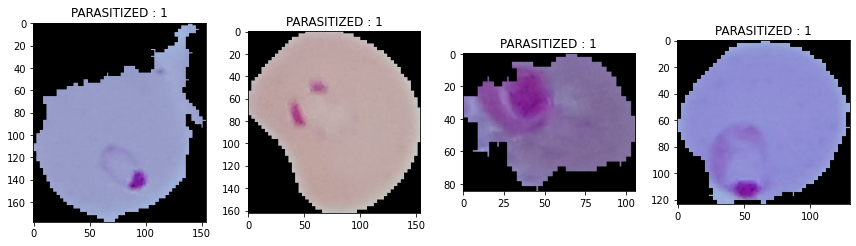

In [11]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

In [37]:
import cv2
cv2.__version__
!pip install opencv-contrib-python --upgrade==4.3.0.36


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

--upgrade option does not take a value


In [38]:
import cv2
cv2.__version__

'4.1.2'

In [34]:
import cv2
from cv2 import dnn_superres

# Create an SR object
sr = dnn_superres.DnnSuperResImpl_create()

# Read the desired model
path = "EDSR_x4.pb"
sr.readModel(path)

# Set the desired model and scale to get correct pre- and post-processing
sr.setModel("edsr", 4)

plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(4, 2, i+1)
    img = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i])
    result = sr.upsample(img)
    plt.imshow(img)
    plt.imshow(result)
    plt.tight_layout()
plt.show()

# Save the image
#cv2.imwrite("./upscaled.png", result)

ImportError: ignored

In [24]:
# Create an SR object
sr = dnn_superres.DnnSuperResImpl_create()
# Read the desired model
path = "EDSR_x4.pb"
sr.readModel(path)

# Set the desired model and scale to get correct pre- and post-processing
sr.setModel("edsr", 4)

plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(4, 3, i+1)
    img = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i])
    result = sr.upsample(img)
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    filter = cv2.filter2D(result, ddepth=-1, kernel=kernel)
    ret, thresh = cv2.threshold(filter,0,255,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)
    # noise removal
    kernel = np.ones((3,3),np.uint8)
    #opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
    closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
    # sure background area
    sure_bg = cv2.dilate(closing,kernel,iterations=3)
    output = [img,result,sure_bg]
    plt.imshow(output[i])
    plt.tight_layout()
plt.show()

# Save the image
#cv2.imwrite("./upscaled.png", result)

ImportError: ignored

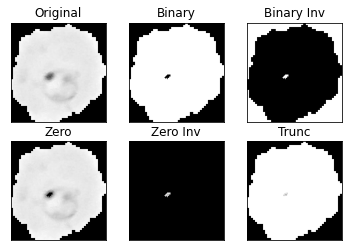

In [ ]:
imgpath1 =  "/content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png"
img = cv2.imread(imgpath1, 0)
th = 0
max_val = 255
    
ret, o1 = cv2.threshold(img, th, max_val, cv2.THRESH_BINARY + cv2.THRESH_OTSU )
ret, o2 = cv2.threshold(img, th, max_val, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )
ret, o3 = cv2.threshold(img, th, max_val, cv2.THRESH_TOZERO + cv2.THRESH_OTSU )
ret, o4 = cv2.threshold(img, th, max_val, cv2.THRESH_TOZERO_INV + cv2.THRESH_OTSU )
ret, o5 = cv2.threshold(img, th, max_val, cv2.THRESH_TRUNC + cv2.THRESH_OTSU )
    
output = [img, o1, o2, o3, o4, o5]
    
titles = ['Original', 'Binary', 'Binary Inv',
              'Zero', 'Zero Inv', 'Trunc']
    
for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(output[i], cmap='gray')
        plt.title(titles[i])
        plt.xticks([])
        plt.yticks([])

plt.show()  

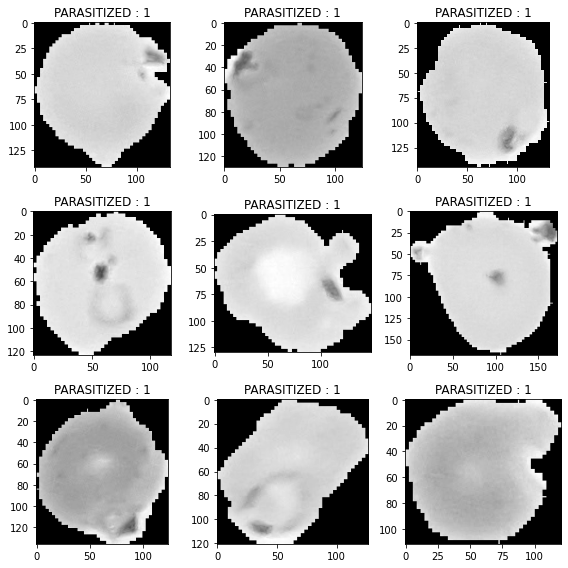

In [ ]:
plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i],0)
    plt.imshow(img, cmap='gray')
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

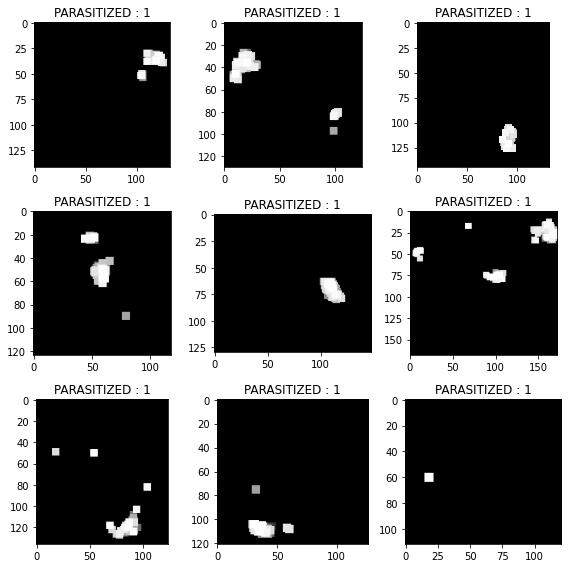

In [ ]:
plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = cv2.imread('/content/cell_images/Parasitized' + "/" + parasitized_data[i],0)
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    img = cv2.filter2D(img, ddepth=-1, kernel=kernel)
    ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)
    # noise removal
    kernel = np.ones((3,3),np.uint8)
    #opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
    closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
    # sure background area
    sure_bg = cv2.dilate(closing,kernel,iterations=3)
    plt.imshow(sure_bg, cmap='gray')
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

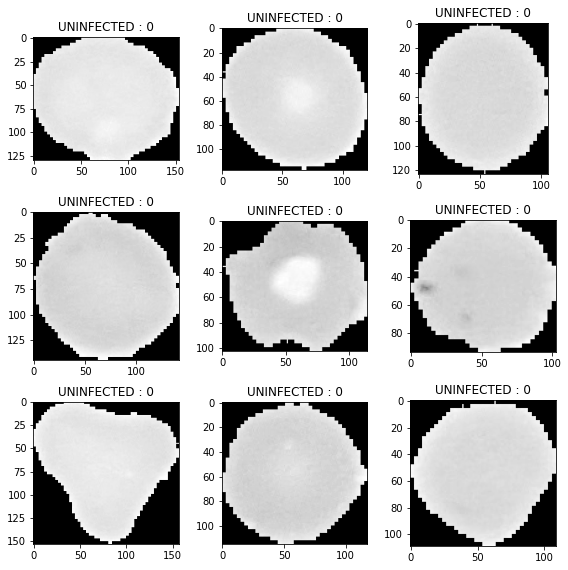

In [ ]:
plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = cv2.imread('/content/cell_images/Uninfected' + "/" + uninfected_data[i],0)
    plt.imshow(img, cmap='gray')
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

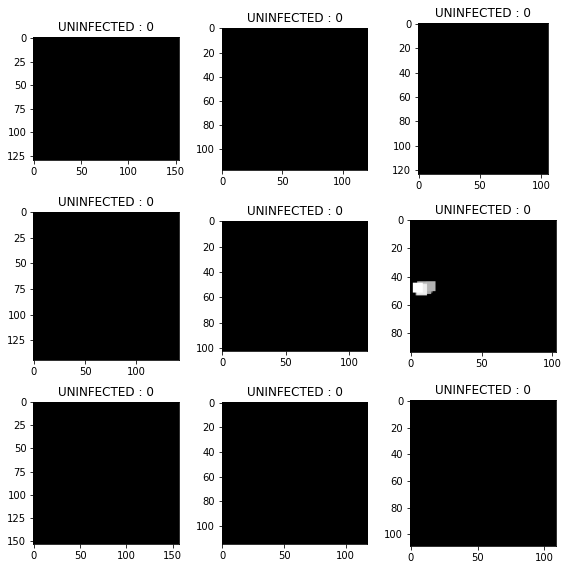

In [ ]:
plt.figure(figsize = (8,8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = cv2.imread('/content/cell_images/Uninfected' + "/" + uninfected_data[i],0)
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    img = cv2.filter2D(img, ddepth=-1, kernel=kernel)
    ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)
    # noise removal
    kernel = np.ones((3,3),np.uint8)
    #opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
    closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
    # sure background area
    sure_bg = cv2.dilate(closing,kernel,iterations=3)
    plt.imshow(sure_bg, cmap='gray')
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

In [ ]:
import os 
infected_dir = "/content/cell_images/Parasitized_segmented"
os.mkdir(infected_dir) 
uninfected_dir = "/content/cell_images/Uninfected_segmented"
os.mkdir(uninfected_dir) 

In [ ]:
for image in parasitized_data:
  try:
      img = cv2.imread('/content/cell_images/Parasitized' + "/" + image,0)
      kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
      img = cv2.filter2D(img, ddepth=-1, kernel=kernel)
      ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)
      # noise removal
      kernel = np.ones((3,3),np.uint8)
      #opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
      closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
      # sure background area
      sure_bg = cv2.dilate(closing,kernel,iterations=3)
      isWritten = cv2.imwrite('/content/cell_images/Parasitized_segmented' + "/" + image, sure_bg)        
      if isWritten:
	        print('Image is successfully saved as file.')
  except:
    None

In [ ]:
for image in uninfected_data:
  try:
      img = cv2.imread('/content/cell_images/Uninfected' + "/" + image,0)
      kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
      img = cv2.filter2D(img, ddepth=-1, kernel=kernel)
      ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_TOZERO_INV+cv2.THRESH_OTSU)
      # noise removal
      kernel = np.ones((3,3),np.uint8)
      #opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
      closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)
      # sure background area
      sure_bg = cv2.dilate(closing,kernel,iterations=3)
      isWritten = cv2.imwrite('/content/cell_images/Uninfected_segmented' + "/" + image, sure_bg)        
      if isWritten:
	        print('Image is successfully saved as file.')
  except:
    None

In [ ]:
!zip -r /content/cell_images.zip /content/cell_images/

## Cross checks

In [ ]:
import os

list = os.listdir('/content/cell_images/Parasitized') # dir is your directory path
number_files = len(list)
print(number_files)
list = os.listdir('/content/cell_images/Parasitized_segmented') # dir is your directory path
number_files = len(list)
print(number_files)
print(len(parasitized_data))

13780
13779
13780


In [ ]:
list = os.listdir('/content/cell_images/Uninfected') # dir is your directory path
number_files = len(list)
print(number_files)
list = os.listdir('/content/cell_images/Uninfected_segmented') # dir is your directory path
number_files = len(list)
print(number_files)
print(len(uninfected_data))

13780
13779
13780


## Segmented data reading

In [ ]:
seg_parasitized_data = os.listdir('/content/cell_images/Parasitized_segmented')
print(seg_parasitized_data[:10]) #the output we get are the .png files

seg_uninfected_data = os.listdir('/content/cell_images/Uninfected_segmented')
print('\n')
print(seg_uninfected_data[:10])

['C179P140ThinF_IMG_20151127_153350_cell_165.png', 'C146P107ThinF_IMG_20151018_134554_cell_253.png', 'C70P31_ThinF_IMG_20150819_141327_cell_79.png', 'C133P94ThinF_IMG_20151004_155144_cell_118.png', 'C51AP12thinF_IMG_20150724_161126_cell_118.png', 'C118P79ThinF_IMG_20151002_110609_cell_6.png', 'C174P135NThinF_IMG_20151127_135554_cell_186.png', 'C84P45ThinF_IMG_20150818_104849_cell_20.png', 'C174P135NThinF_IMG_20151127_135554_cell_197.png', 'C184P145ThinF_IMG_20151203_104334_cell_26.png']


['C121P82ThinF_IMG_20151002_132926_cell_63.png', 'C231ThinF_IMG_20151112_153359_cell_147.png', 'C241NThinF_IMG_20151207_124030_cell_98.png', 'C4thin_original_IMG_20150608_165908_cell_102.png', 'C67P28N_ThinF_IMG_20150819_115955_cell_13.png', 'C110P71ThinF_IMG_20150930_105925_cell_28.png', 'C107P68ThinF_IMG_20150924_221632_cell_42.png', 'C5NThinF_IMG_20150609_122108_cell_141.png', 'C82P43ThinF_IMG_20150817_123824_cell_4.png', 'C239ThinF_IMG_20151127_113150_cell_196.png']


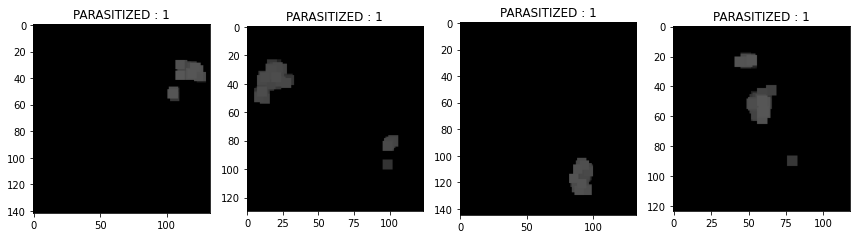

In [ ]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/content/cell_images/Parasitized_segmented' + "/" + seg_parasitized_data[i])
    plt.imshow(img)
    plt.title('PARASITIZED : 1')
    plt.tight_layout()
plt.show()

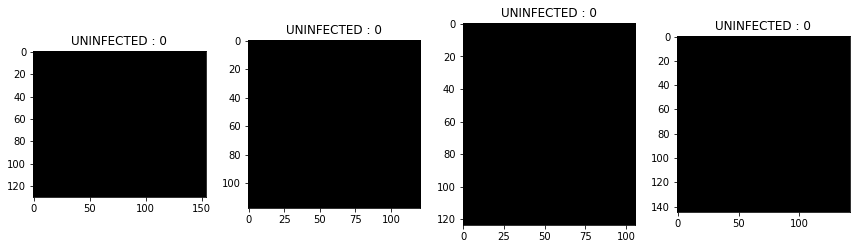

In [ ]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('/content/cell_images/Uninfected_segmented' + "/" + seg_uninfected_data[i])
    plt.imshow(img)
    plt.title('UNINFECTED : 0')
    plt.tight_layout()
plt.show()

In [ ]:
data = []
labels = []
for img1 in seg_parasitized_data:
    try:
        img_read = plt.imread('/content/cell_images/Parasitized_segmented' + "/" + img1)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img1 in seg_uninfected_data:
    try:
        img_read = plt.imread('/content/cell_images/Uninfected_segmented' + "/" + img1)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

In [ ]:
image_data = np.array(data)
labels = np.array(labels)

In [ ]:
idx = np.arange(image_data.shape[0])
image_data = image_data[idx]
labels = labels[idx]

In [ ]:
image_data.shape, labels.shape

((27558, 50, 50, 1), (27558,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [ ]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [ ]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (22046, 50, 50, 1)
SHAPE OF TESTING IMAGE DATA : (5512, 50, 50, 1)
SHAPE OF TRAINING LABELS : (22046, 2)
SHAPE OF TESTING LABELS : (5512, 2)


In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape= (50,50,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',input_shape= (50,50,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu',input_shape= (50,50,1)))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 22, 22, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 9, 9, 32)          18464     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 32)        

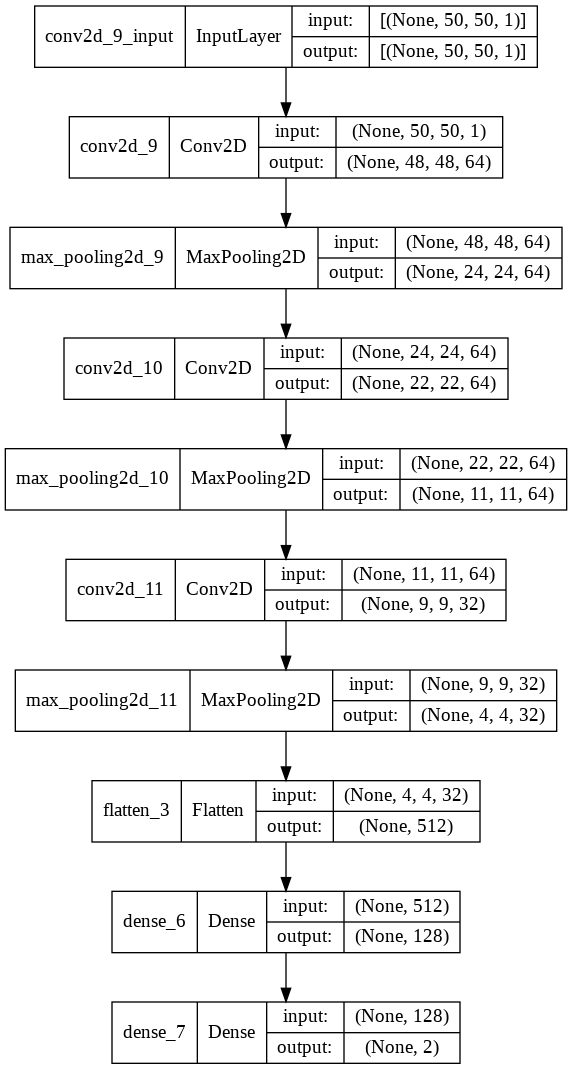

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes=True)

In [ ]:
model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = 10)

Epoch 1/10
689/689 [==============================] - 132s 190ms/step - loss: 0.3058 - accuracy: 0.9219 - val_loss: 0.1954 - val_accuracy: 0.9409
Epoch 2/10
689/689 [==============================] - 128s 186ms/step - loss: 0.1898 - accuracy: 0.9437 - val_loss: 0.2067 - val_accuracy: 0.9311
Epoch 3/10
689/689 [==============================] - 127s 184ms/step - loss: 0.1832 - accuracy: 0.9428 - val_loss: 0.1856 - val_accuracy: 0.9423
Epoch 4/10
689/689 [==============================] - 128s 186ms/step - loss: 0.1772 - accuracy: 0.9461 - val_loss: 0.1916 - val_accuracy: 0.9430
Epoch 5/10
689/689 [==============================] - 131s 190ms/step - loss: 0.1735 - accuracy: 0.9479 - val_loss: 0.1856 - val_accuracy: 0.9430
Epoch 6/10
689/689 [==============================] - 128s 186ms/step - loss: 0.1698 - accuracy: 0.9479 - val_loss: 0.2059 - val_accuracy: 0.9399
Epoch 7/10
689/689 [==============================] - 131s 190ms/step - loss: 0.1687 - accuracy: 0.9472 - val_loss: 0.1838 -

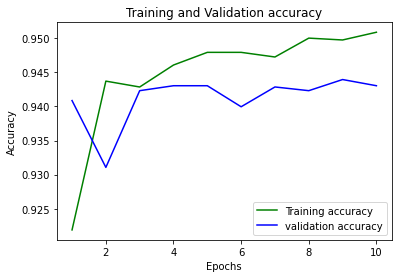

In [ ]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, accuracy_train, 'g', label='Training accuracy')
plt.plot(epochs, accuracy_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

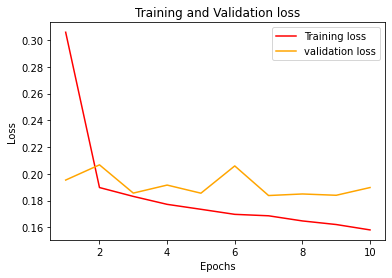

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'orange', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Reference code

https://www.analyticsvidhya.com/blog/2021/09/image-segmentation-algorithms-with-implementation-in-python/

https://www.askpython.com/python-modules/opencv-filter2d